In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json   # 파이썬의 기본 모듈 중 하나 - json 읽기/쓰기 기능

**JSON** 

* JSON(JavaScript Object Notation): 자바스크립트 객체 표현법
* {key1: value1, key2: value2, ... } 같은 형식의 문자열 
* 파이썬의 dict 클래스 타입과 비슷
* json 모듈: JSON 형식 문자열 <---> dict 타입 객체 

In [3]:
# json.dumps(obj): 파이썬 객체(Obj)를 JSON 형식의 문자열로 변환 - Serialize(직렬화) 
person = {'name': '홍길도', 'age': 16, 'height': 195.5}
person  #> dict 클래스의  __repr__() 메서드가 리턴하는 문자열이 콘솔에 출력 

{'age': 16, 'height': 195.5, 'name': '홍길도'}

In [4]:
type(person)  #> 파이썬 dict 클래스 타입의 객체

dict

In [5]:
person_json = json.dumps(person)
person_json  #> json.dumps() 함수가 리턴해준 문자열을 콘솔에 출력 

'{"name": "\\ud64d\\uae38\\ub3c4", "age": 16, "height": 195.5}'

In [6]:
# json.loads(s): JSON 형식의 문자열 s를 파이썬 객체로 변환해서 리턴 - Deserialize(역직렬화) 
result = json.loads(person_json)
result

{'age': 16, 'height': 195.5, 'name': '홍길도'}

In [7]:
type(result)

dict

* `json.dump(obj, fp)`: 파이썬 객체 obj를 JSON 형식의 문자열로 변환(serialize)해서 파일 fp에 write 
* `json.load(fp)`: 파일 fp에서 문자열(JSON 형식)을 읽어서 파이썬 객체로 변환 (deserialize)해서 리턴
* `json.dumps(s)`: 파이썬 객체 obj를 JSON 형식의 문자열로 변환(serialize)해서 리턴
* `json.loads(s)`: 문자열 s(JSON 형식)를 파이썬 객체로 변환(deserialize)해서 리턴 

In [8]:
with open('person.json', mode='w') as f: # 파일을 쓰기 모드로 오픈
    f.write(person_json)   # 파일에 문자열을 씀

In [9]:
with open('person.json', mode='r') as f: # 파일을 읽기 모드로 오픈
    line = f.readline() # 파일의 첫번재 줄을 읽음 
    print(line)
    obj = json.loads(line)  # 읽은 문자열을 파이썬 객체로 변환 
    print(obj) 

{"name": "\ud64d\uae38\ub3c4", "age": 16, "height": 195.5}
{'name': '홍길도', 'age': 16, 'height': 195.5}


In [10]:
with open('movie.json', mode='w') as f:
    # Python dict 객체 
    m1 = {'mid':1, 'title': '미나리', 'genre': 'Drama'}
    m2 = {'mid':2, 'title': '승리호', 'genre': 'SF'}
    m3 = {'mid':3, 'title': '인턴'}
    # jSON 형식의 문자열
    m1_s = json.dumps(m1)
    m2_s = json.dumps(m2)
    m3_s = json.dumps(m3)
    # 파일에 쓰기
    f.write(m1_s + '\n')
    f.write(m2_s + '\n')
    f.write(m3_s + '\n')

In [14]:
with open('movie.json', mode='r') as f:
    data = []   # 파일에서 읽은 내용을 저장할 리스트
    for line in f:   # 파일에서 한줄 씩 읽으면서
        obj = json.loads(line)   # 문자열을 파이썬 객체로 변환(deserialize) 
        print(obj)
        data.append(obj)   # 리스트에 추가
    # data = [json.loads(line) for line in f]

{'mid': 1, 'title': '미나리', 'genre': 'Drama'}
{'mid': 2, 'title': '승리호', 'genre': 'SF'}
{'mid': 3, 'title': '인턴'}


In [15]:
data

[{'genre': 'Drama', 'mid': 1, 'title': '미나리'},
 {'genre': 'SF', 'mid': 2, 'title': '승리호'},
 {'mid': 3, 'title': '인턴'}]

In [16]:
df = pd.DataFrame(data) 
df 

,mid,title,genre
0,1,미나리,Drama
1,2,승리호,SF
2,3,인턴,NaN


* https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/bitly_usagov/example.txt 파일을 다운로드
* 다운로드한 파일을 Colab 세션 저장소에 업로드 
* 파일을 읽기 모드로 오픈
* 파일에서 첫번재 줄부터 마지막 줄까지 한 줄씩 읽으면서 
* 읽은 문자열을 파이썬 dict 객체로 변환하고 리스트에 추가(append) 

In [19]:
with open('example.txt', mode='r') as f:
    records = [json.loads(line) for line in f]
    print(len(records))

3560


In [20]:
df = pd.DataFrame(records)
df.head()
#> usa.gov 사이트를 접속한 클라이언트에 대한 정보들을 가지고 있는 파일 

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [21]:
df.tail()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN
3559,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,0.0,America/New_York,VA,qxKrTK,qxKrTK,bitly,en-US,1.usa.gov,http://t.co/OEEEvwjU,http://herndon-va.gov/Content/public_safety/Pu...,1.331927e+09,1.312898e+09,Mc Lean,"[38.935799, -77.162102]",NaN,NaN


In [22]:
df.info()
#> json 파일(비정형, 반정형 데이터)을 데이터프레임으로 변환하게 되면 보통 NA들이 많이 생기게 됨 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

* tz 컬럼에는 몇 개의 시간대(timezone)가 있을까?
* 가장 많이 접속한 지역?  

In [23]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [24]:
# tz 컬럼의 unique한 값들의 빈도수
df['tz'].value_counts()
#> value_counts() 메서드는 NA의 개수를 세지 않음! 

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
Europe/Sofia                    1
America/Argentina/Mendoza       1
Europe/Volgograd                1
Asia/Novosibirsk                1
Europe/Ljubljana                1
Name: tz, Length: 97, dtype: int64

In [25]:
df['tz'].value_counts().iloc[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [39]:
# NA의 개수도 표기 
df_clean = df.copy()   # 데이터프레임 복사 
df_clean['tz'] = df_clean['tz'].fillna('Missing')  # NA(값이 없음)를 'Missing' 문자열로 대체

In [40]:
df_clean['tz'].value_counts().head(n=10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [41]:
df['tz'].value_counts().head(n=10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [46]:
df_clean['tz'] = np.where(df_clean['tz'] == '', 'Unkown', df_clean['tz'])
# tz 컬럼의 값이 ''(empty string)이면 'Missing'으로 대체하고, 그렇지 않으면 원래 값 그대로 사용
s = df_clean['tz'].value_counts().head(n=10)
s

America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

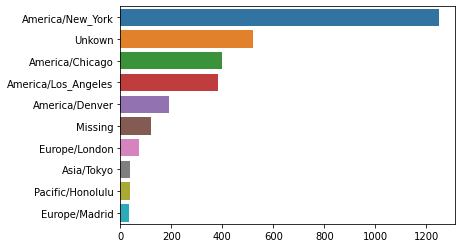

In [47]:
sns.barplot(x=s.values, y=s.index)
plt.show()

In [45]:
df_clean['tz'].value_counts().tail(n=20)

America/Argentina/Mendoza         1
Asia/Pontianak                    1
Africa/Johannesburg               1
America/Costa_Rica                1
America/La_Paz                    1
Africa/Lusaka                     1
Asia/Yekaterinburg                1
America/Argentina/Buenos_Aires    1
Africa/Casablanca                 1
America/Caracas                   1
America/St_Kitts                  1
America/Lima                      1
America/Montevideo                1
Asia/Novosibirsk                  1
Europe/Ljubljana                  1
America/Monterrey                 1
Asia/Kuching                      1
Europe/Volgograd                  1
Europe/Skopje                     1
Australia/Queensland              1
Name: tz, dtype: int64

In [50]:
# 접속 시간대(timezone)에 한국 서울 시간대(Asia/Seoul)이 있을까요? 
df_clean[df_clean['tz'].str.contains('Seoul')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
1428,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,KR,1.0,Asia/Seoul,11,y7mqmw,w41aUb,rebroth,"en-US,en;q=0.8",1.usa.gov,http://t.co/l16apDbA,http://apod.nasa.gov/apod/ap120314.html,1.331925e+09,1.331739e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3154,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,0.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3175,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,1.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3496,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,https://twitter.com/whitehouse/status/18067782...,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3506,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,direct,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN


In [52]:
# 접속한 국가 빈도수
df_clean['c'].value_counts().head(n=10)

US    2305
GB      74
CA      60
ES      37
JP      37
BR      35
DE      28
IT      27
NL      22
MX      19
Name: c, dtype: int64

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3560 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [56]:
df_clean['c'] = df_clean['c'].fillna('Missing')
df_clean['c'].value_counts().head(n=10)

US         2305
Missing     641
GB           74
CA           60
JP           37
ES           37
BR           35
DE           28
IT           27
NL           22
Name: c, dtype: int64

In [59]:
# 접속한 클라이언트 os 정보
df_clean['a'] = df_clean['a'].fillna('Missing')  # a 컬럼의 NA들을 'Missing'으로 대체
df_clean[df_clean['a'].str.contains('Windows')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,en-us,bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331927e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
3554,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,en-us,bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331927e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN


In [61]:
df_clean[df_clean['a'].str.contains('Linux')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,Missing,0.0,Unkown,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
51,Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; L...,US,0.0,America/New_York,VA,wcndER,zkpJBR,bnjacobs,en-US,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Woodbridge,"[38.625702, -77.266502]",NaN,NaN
199,Mozilla/5.0 (Linux; U; Android 2.3.4; en-us; D...,US,0.0,America/New_York,MI,xXXY0s,FOgTq7,vangheem,en-US,1.usa.gov,http://t.co/hVJbTxoY,http://www.fbi.gov/news/pressrel/press-release...,1.331923e+09,1.331921e+09,Grand Rapids,"[42.9384, -85.6436]",NaN,NaN
207,Mozilla/5.0 (Linux; U; Android 2.3.4; es-es; L...,ES,1.0,Europe/Madrid,31,wUsrEq,wUsrEq,bitly,"es-ES, en-US",1.usa.gov,http://t.co/s2zXjXQG,http://www.nasa.gov/topics/earth/features/seac...,1.331923e+09,1.331671e+09,Abanilla,"[38.200001, -1.05]",NaN,NaN
229,Mozilla/5.0 (Linux; U; Android 2.3.4; es-es; L...,ES,1.0,Europe/Madrid,31,xVZg4P,wqUkTo,nasatwitter,"es-ES, en-US",go.nasa.gov,http://t.co/UKGBxj29,http://www.nasa.gov/multimedia/imagegallery/im...,1.331923e+09,1.331908e+09,Abanilla,"[38.200001, -1.05]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,MOT-MB525/Blur_Version.34.4.709.MB525.Latam.en...,Missing,0.0,Unkown,NaN,xVZg4P,wqUkTo,nasatwitter,"es-US, en-US",go.nasa.gov,http://t.co/UKGBxj29,http://www.nasa.gov/multimedia/imagegallery/im...,1.331927e+09,1.331908e+09,NaN,NaN,NaN,NaN
3442,Mozilla/5.0 (Linux; U; Android 2.3.3; en-us; D...,Missing,0.0,Unkown,NaN,A2vbBC,zbsayZ,martinberkhan,en-US,1.usa.gov,http://t.co/Itza5prh,http://www.ncbi.nlm.nih.gov/pubmed/22344061,1.331927e+09,1.331505e+09,NaN,NaN,NaN,NaN
3470,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:11....,US,0.0,America/New_York,NJ,wcndER,zkpJBR,bnjacobs,"en-us,en;q=0.5",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319267...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331927e+09,1.331923e+09,Mantua,"[39.7864, -75.1791]",NaN,NaN
3471,Mozilla/5.0 (Linux; U; Android 2.2; en-us; SAM...,Missing,0.0,Unkown,NaN,xVZg4P,wqUkTo,nasatwitter,en-US,go.nasa.gov,http://t.co/UKGBxj29,http://www.nasa.gov/multimedia/imagegallery/im...,1.331927e+09,1.331908e+09,NaN,NaN,NaN,NaN


In [62]:
# df_clean 데이터프레임에 OS 컬럼(파생변수) 추가 - ['Windows', 'Other']
df_clean['OS']  = np.where(df_clean['a'].str.contains('Windows'), 'Windows', 'Other')
df_clean.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,OS
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [64]:
# tz(시간대)별, OS(운영체제)별 빈도수
df_clean.groupby(by=['tz', 'OS']).size()

tz                   OS     
Africa/Cairo         Windows      3
Africa/Casablanca    Windows      1
Africa/Ceuta         Windows      2
Africa/Johannesburg  Windows      1
Africa/Lusaka        Windows      1
                               ... 
Pacific/Auckland     Other        3
                     Windows      8
Pacific/Honolulu     Windows     36
Unkown               Other      245
                     Windows    276
Length: 150, dtype: int64

In [65]:
df_clean.groupby(by=['tz', 'OS']).size().unstack()

OS,Other,Windows
tz,,
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
...,...,...
Europe/Zurich,4.0,NaN
Missing,120.0,NaN
Pacific/Auckland,3.0,8.0


In [70]:
tz_os_counts = df_clean.pivot_table(index='tz', columns='OS', aggfunc='size')
tz_os_counts

OS,Other,Windows
tz,,
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
...,...,...
Europe/Zurich,4.0,NaN
Missing,120.0,NaN
Pacific/Auckland,3.0,8.0


In [73]:
# 접속이 가장 많은 timezone 10개
tz_os_counts.loc[s.index]  

OS,Other,Windows
America/New_York,339.0,912.0
Unkown,245.0,276.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Missing,120.0,NaN
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,NaN,36.0
Europe/Madrid,16.0,19.0


In [74]:
1 + np.nan

nan

In [76]:
tz_os_counts.fillna(0).sum()

OS,Other,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Zurich,4.0,0.0
Missing,120.0,0.0
Pacific/Auckland,3.0,8.0


In [77]:
tz_os_counts.fillna(0).sum(axis=1)

tz
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
Africa/Lusaka            1.0
                       ...  
Europe/Zurich            4.0
Missing                120.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Unkown                 521.0
Length: 98, dtype: float64

In [78]:
tz_os_counts.fillna(0).sum(axis=1).sort_values(ascending=False)

tz
America/New_York         1251.0
Unkown                    521.0
America/Chicago           400.0
America/Los_Angeles       382.0
America/Denver            191.0
                          ...  
America/Santo_Domingo       1.0
Asia/Novosibirsk            1.0
America/St_Kitts            1.0
America/Tegucigalpa         1.0
Europe/Ljubljana            1.0
Length: 98, dtype: float64

In [81]:
tz_os_counts.fillna(0).sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
Unkown                  521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Missing                 120.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
dtype: float64